c:\Users\Aleem Amjad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted price: 656202.2455707048
Coefficients: [   59.28388603 22868.95310625 38240.2190921  19126.49092254
 46058.59875094   725.72453217   -69.61362236]
Intercept: -1409053.2272799485

 Evaluation Metrics:
MAE  (Mean Absolute Error):      16626.75
MSE  (Mean Squared Error):       346101925.57
RMSE (Root Mean Squared Error):  18603.81
R² Score (Explained Variance):   0.9515


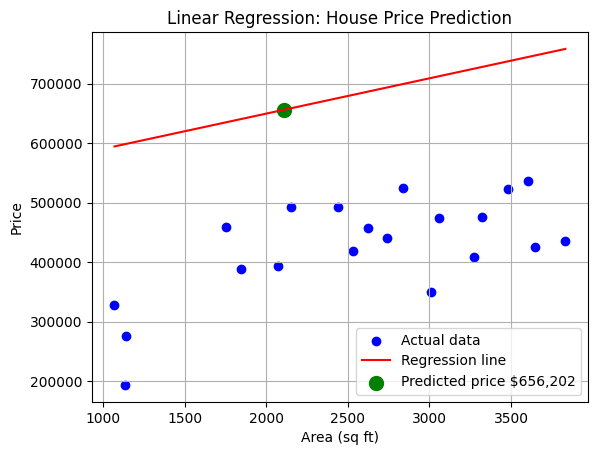

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Data
df = pd.read_csv('House_price.csv')

# Features and Target
x = df[['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Garage', 'YearBuilt', 'DistanceToCity']]
y = df['Price']

# Train Model
model = LinearRegression()
model.fit(x, y)

# Predict new house
new_house = np.array([[2111, 6, 5, 3, 2, 2015, 2]])
new_price = model.predict(new_house)

# Output model details
print('Predicted price:', new_price[0])
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# ---- Evaluation Metrics ----
y_pred = model.predict(x)  # predictions on training data
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("\n Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):       {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"R² Score (Explained Variance):   {r2:.4f}")

# ---- Visualization ----
area_range = np.linspace(df['Area'].min(), df['Area'].max(), 100)
x_line = pd.DataFrame({
    'Area': area_range,
    'Bedrooms': 6,          # fix value
    'Bathrooms': 5,
    'Stories': 3,
    'Garage': 2,
    'YearBuilt': 2015,
    'DistanceToCity': 2
})

y_line = model.predict(x_line)

plt.scatter(df['Area'], y, color='blue', label='Actual data')
plt.plot(area_range, y_line, color='red', label='Regression line')
plt.scatter(new_house[0][0], new_price, color='green', s=100, label=f'Predicted price ${new_price[0]:,.0f}')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Linear Regression: House Price Prediction")
plt.legend()
plt.grid(True)
plt.show()
